# Relationship Between Car Features
## by Aina Tolulope

## Investigation Overview

In this investiation, I looked into the features of cars and the relationships between. My main focus was on Combined Fuel Efficiency, CO2 emission, engine Displacement, number of engine Cylinders, manufacturing Year, Vehicle Class, Fuel Type, Transmission Type, Fuel Economy Score and Greenhouse Gas Score.  


## Dataset Overview

This data consisted of car models, vehicle class, transmission type, fuel type, fuel efficiency, CO2 emission scores and other attributes for approximately 4,000 cars. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# read the dataset from a csv file into pandas dataframe
fuel_econ= pd.read_csv('fuel-econ.csv')

In [3]:
# convert 'year', 'cylinders', 'feScore' and 'ghgScore' to appropiate datatype
fuel_econ['year']= fuel_econ['year'].astype('category')
fuel_econ['cylinders']= fuel_econ['cylinders'].astype('category')
fuel_econ['feScore']= fuel_econ['feScore'].astype('category')
fuel_econ['ghgScore']= fuel_econ['ghgScore'].astype('category')

In [4]:
# convert 'year', 'VClass', and 'cylinders' into ordered categorical types
ordinal_var_dict = {'year': [2013, 2014, 2015, 2016, 2017, 2018],
                    'VClass': ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars'],
                    'cylinders': [2, 3, 4, 5, 6, 8, 12],
                   'feScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                   'ghgScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    fuel_econ[var] = fuel_econ[var].astype(ordered_var)

In [5]:
# convert 'trans' to either of Automatic or Manual
fuel_econ['trans']= fuel_econ['trans'].apply(lambda x: x.split()[0])

## Distribution of Combined Fuel Efficiency

The distribution of combined fuel efficiency is slightly right-skewed, covering a small range of values between 12 and 58.

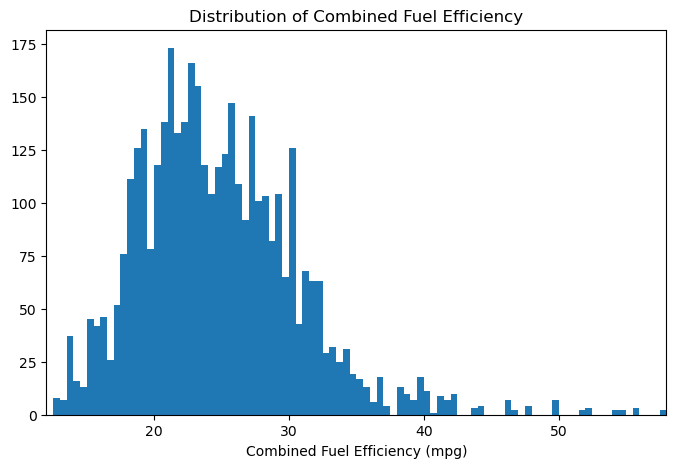

In [6]:
bins = np.arange(0, fuel_econ['comb'].max()+0.5, 0.5)

plt.figure(figsize=[8, 5])
plt.hist(data = fuel_econ, x = 'comb', bins = bins)
plt.title('Distribution of Combined Fuel Efficiency')
plt.xlim(12, 58)
plt.xlabel('Combined Fuel Efficiency (mpg)')
plt.show()

## Distribution of CO2 Emissions

The distribution of CO2 emissions left-skewed distribution, slightly bimodal, with peak points at 310 and 340.

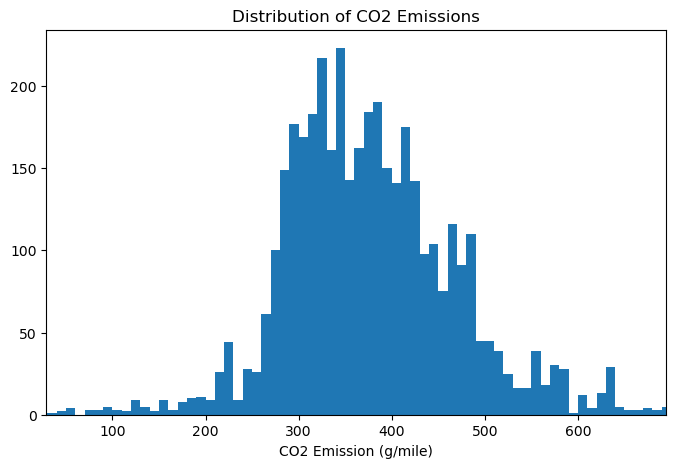

In [7]:
bins = np.arange(0, fuel_econ['co2'].max()+10, 10)

plt.figure(figsize=[8, 5])
plt.hist(data = fuel_econ, x = 'co2', bins = bins)
plt.title('Distribution of CO2 Emissions')
plt.xlim(29, 695)
plt.xlabel('CO2 Emission (g/mile)')
plt.show()

## Displacement, Combined Fuel Efficiency and CO2 Emission Correlation Map

There's a negative correlation between combined fuel efficiency and displacement and a positive correlation between CO2 emmisions and displacement, shown by the respective correlation coefficient of both relationships.
There's a strong inverse relationship between combined fuel efficiency and CO2 emissions, with a very high negative correlation coefficient of -0.929.

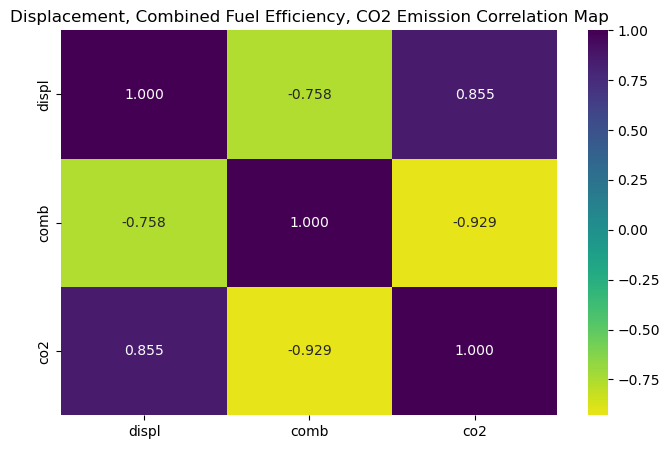

In [8]:
numeric_vars = ['displ', 'comb', 'co2']
plt.figure(figsize = [8, 5])
sb.heatmap(fuel_econ[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0)
plt.title('Displacement, Combined Fuel Efficiency, CO2 Emission Correlation Map')
plt.show()


## Relationship Between Displacement, Combined Fuel Efficiency, CO2 Emission and Fuel Type, Cylinders, Fuel Economy Score, Greenhouse Gas Score

There's a positive correlation between the number of cylinders and displacement. Higher CO2 emissions are seen with increasing cylinder numbers. The reverse is the case for combined fuel efficiency.
Premium gasoline is the most common fuel type. This fuel type produce the most CO2 emissions of the five fuel types.
There's a positive correlation between combined fuel efficiency and fuel economy score. The relationship between CO2 emission and greenhouse gas score is identical in linearity but inverse in magnitude.
This results in a strong linear, positive relationship between fuel economy score and greenhouse gas score.

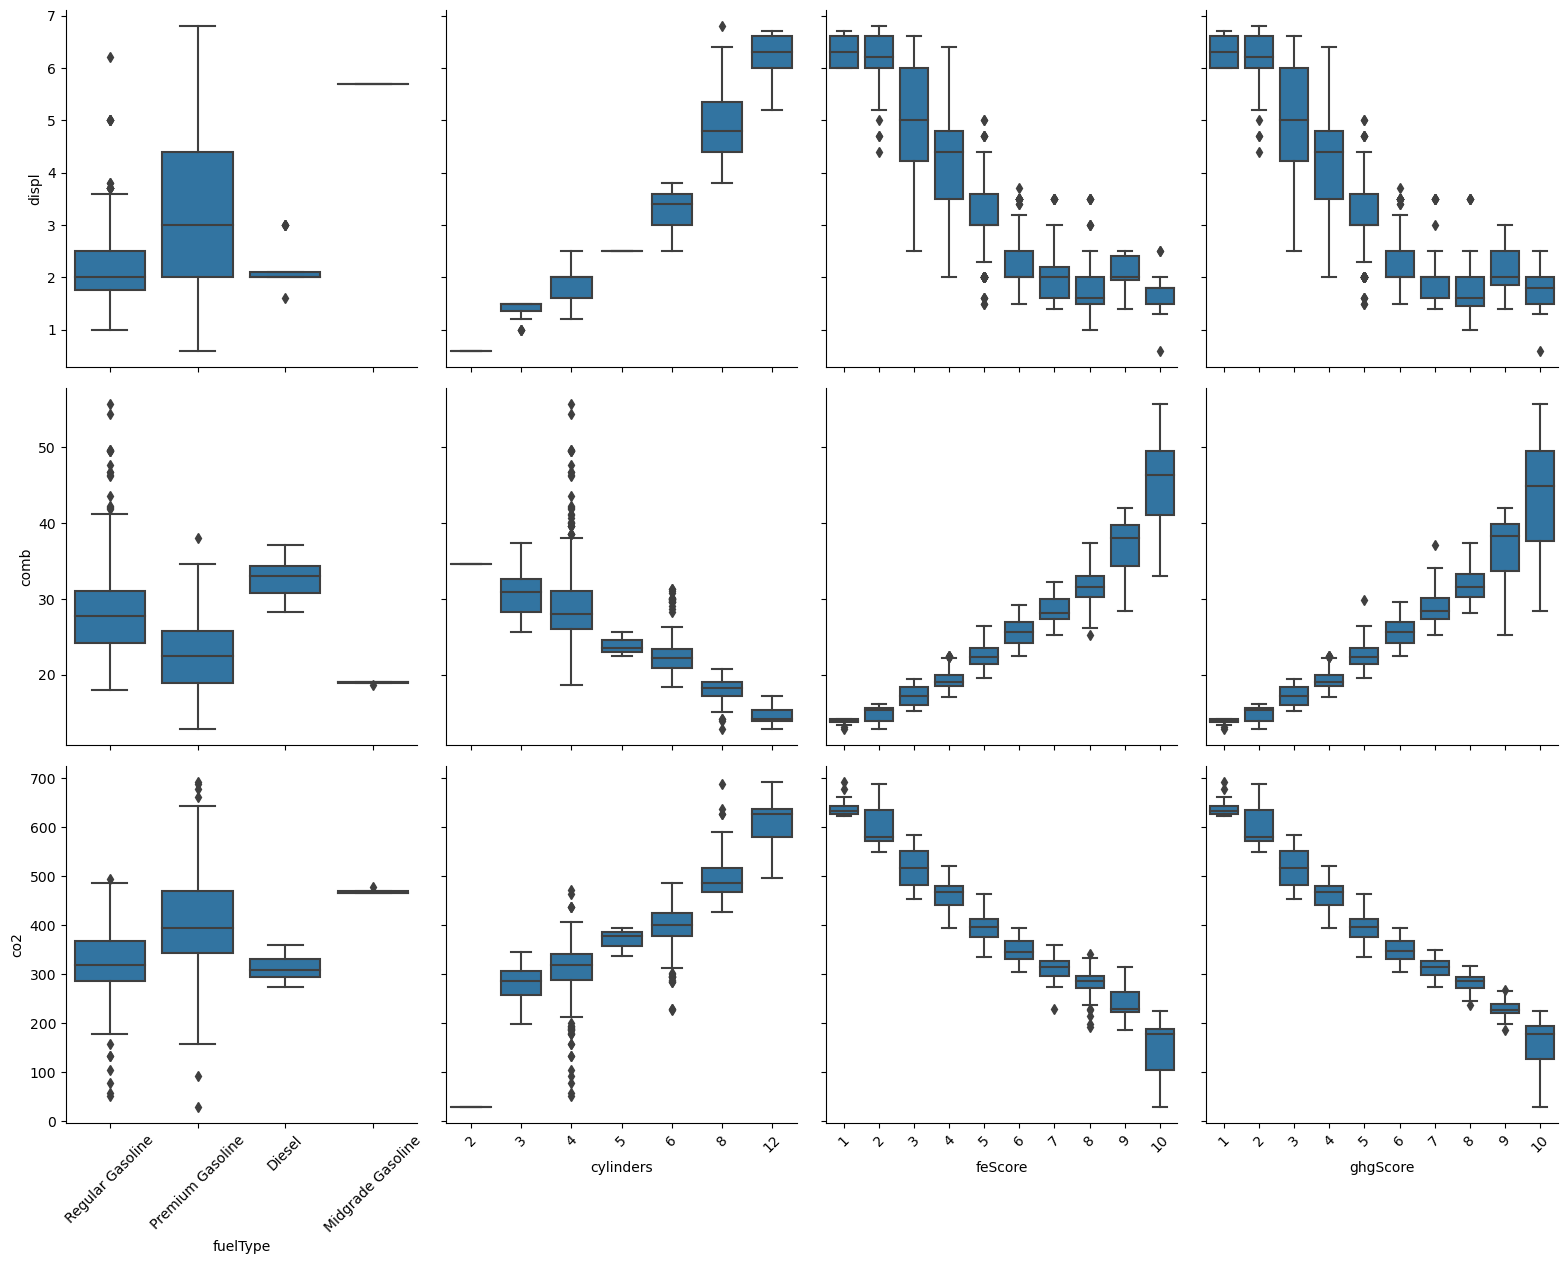

In [9]:
fuel_econ_sample = fuel_econ.sample(n=1000, replace = False)
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)
    plt.xticks(rotation= 45)
    
g = sb.PairGrid(data = fuel_econ_sample, y_vars = numeric_vars, x_vars = ['fuelType', 'cylinders', 'feScore', 'ghgScore'],
                height = 4, aspect = 1)
g.map(boxgrid)
plt.show()

In [10]:
!jupyter nbconvert Part_II_Fuel_Economy_Dataset_Explanatory_Analysis.ipynb --to slides --no-input

[NbConvertApp] Converting notebook Fuel_Economy_Dataset_Exploration_Part_II.ipynb to slides
[NbConvertApp] Writing 781607 bytes to Fuel_Economy_Dataset_Exploration_Part_II.slides.html
